# 1. Introduction 

A brief description of your approach to the problem and the results that you have obtained on the training data.

<font color="red"><b>!!!!!!!! FILL THIS IN PLS<b>

# 2. Importing Libraries

This section is how you import the data into the notebook. It should be written in such a way that I can modify it to run on my own machine by simply changing the location of the training data and any additional data sources that you have used.


In [2]:
import numpy as np
import pandas as pd
import pandas_profiling
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from pandas_ml import ConfusionMatrix

from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import fbeta_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline = False, world_readable = True)
%matplotlib inline

# from Ipython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all" #"last_expr"


# Data dictionary
Below is a data dictionary from https://www.kaggle.com/yapsoonchung/eda-on-default-of-credit-card-clients-dataset/comments

# 3. EDA

any exploration of the data that you performed such as visualization, feature extraction, etc.

# Todo list
+ runtime vs 的图
+ limit 和每月bill的差
+ 每月pay和bill的差
+ auto tune vs

### Load the datasets

In [37]:
df_train = pd.read_csv("DataFiles/CreditCard_train.csv",header = 1)
df_test = pd.read_csv("DataFiles/CreditCard_test.csv",header = 1)
all_data = pd.concat([df_train,df_test])
all_data["ID"] = range(1,30001)
all_data.set_index('ID')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [4]:
# split the original train test data 
otrain_y = df_train['default payment next month']
otrain_x = df_train
otrain_x.drop('default payment next month', axis = 1,inplace = True)
otrain_x.drop('ID', axis = 1,inplace = True)
otest_y = df_test['default payment next month']
otest_x = df_test
otest_x.drop('default payment next month', axis = 1,inplace = True)
otest_x.drop('ID', axis = 1,inplace = True)

In [5]:
#check data types, features, null values
all_data.info()
# all_data.drop('ID', axis = 1,inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 5999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                

In [6]:
general_stats= all_data.describe().iloc[:,0:6]
pay_status_stats = all_data.describe().iloc[:,6:12]
bill_stats = all_data.describe().iloc[:,12:18]
payed_stats = all_data.describe().iloc[:,18:24]

In [7]:
general_stats

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000


In [8]:
pay_status_stats

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [9]:
bill_stats

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [10]:
payed_stats

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


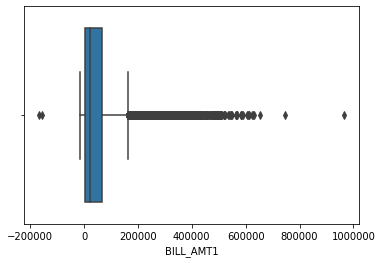

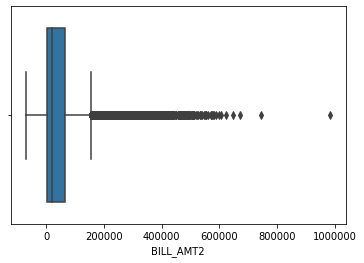

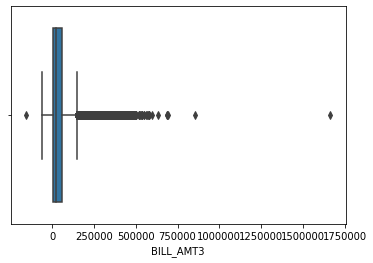

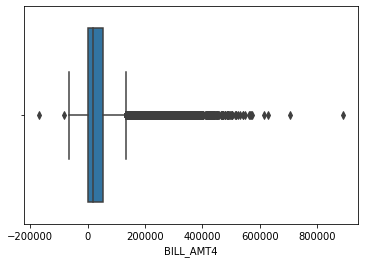

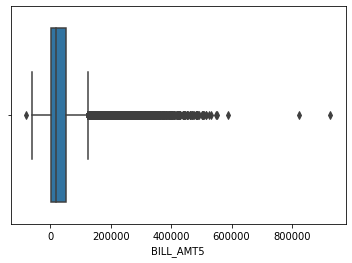

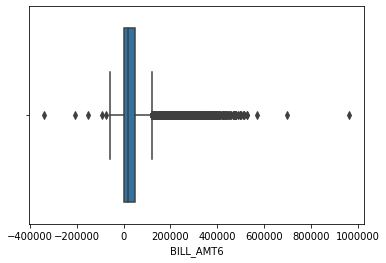

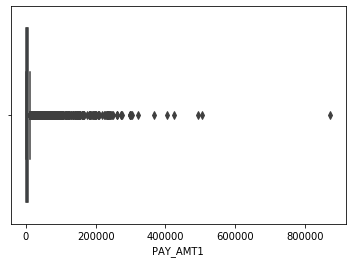

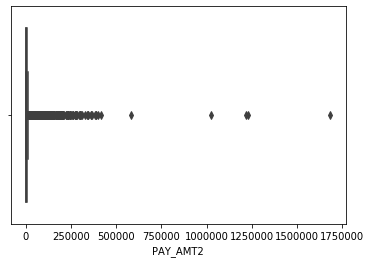

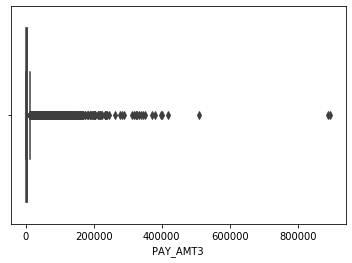

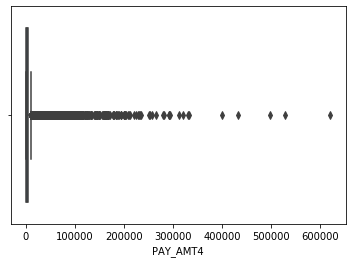

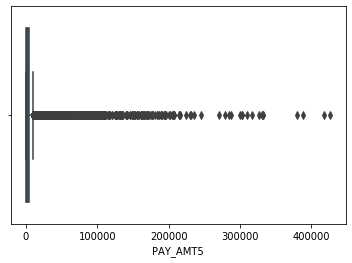

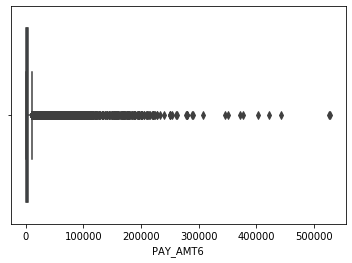

In [30]:
for c in all_data.columns[12:24]:
    ax = sns.boxplot(x=all_data[c])
    plt.show()

In [34]:
all_data["BILL_AMT1"]

0         3913
1         2682
2        29239
3        46990
4         8617
5        64400
6       367965
7        11876
8        11285
9            0
10       11073
11       12261
12       12137
13       65802
14       70887
15       50614
16       15376
17      253286
18           0
19           0
20       38358
21         316
22       41087
23        5512
24        4744
25       47620
26        -109
27       22541
28         650
29       15329
         ...  
5970     33654
5971     65554
5972     21628
5973         0
5974     10904
5975     45075
5976     52358
5977    131939
5978    238973
5979         0
5980     43998
5981     38671
5982      7752
5983      1822
5984       315
5985         0
5986      2220
5987     23292
5988    279640
5989      3425
5990    138325
5991      2500
5992      8802
5993      3042
5994     72557
5995    188948
5996      1683
5997      3565
5998     -1645
5999     47929
Name: BILL_AMT1, Length: 30000, dtype: int64

In [31]:
for c in all_data.columns[12:18]:
    if all_data[c]> (67091+200000):
        

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
5,64400,57069,57608,19394,19619,20024
6,367965,412023,445007,542653,483003,473944
7,11876,380,601,221,-159,567
8,11285,14096,12108,12211,11793,3719
9,0,0,0,0,13007,13912


In [11]:
pandas_profiling.ProfileReport(all_data)

Number of variables,26
Number of observations,30000
Total Missing (%),0.0%
Total size in memory,6.0 MiB
Average record size in memory,208.0 B
Numeric,19
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,5


In [27]:
all_data.iloc[:,12:18][all_data["BILL_AMT1"]>=200000].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000
mean,288636.030860,267254.416284,246367.841103,219957.489823,200501.173999,190027.435982
std,86265.385282,99916.527238,105388.449555,110072.054904,108731.878056,109221.671381
min,200239.000000,-22960.000000,-17706.000000,-170000.000000,-6187.000000,-39046.000000
25%,225754.500000,212228.000000,196494.500000,157178.000000,135350.000000,123874.000000
50%,260356.000000,249018.000000,235796.000000,216712.000000,197544.000000,190628.000000
75%,324874.500000,311255.000000,298225.000000,278867.500000,259156.000000,251217.000000
max,964511.000000,983931.000000,693131.000000,891586.000000,927171.000000,961664.000000


Probrably will only keep billamt1

In [13]:
# all_data.iplot()

<font color="red"> # fill this in 
    
Please elaborate on the following graphs

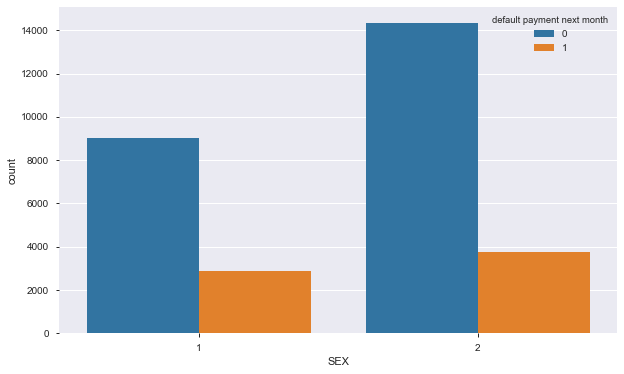

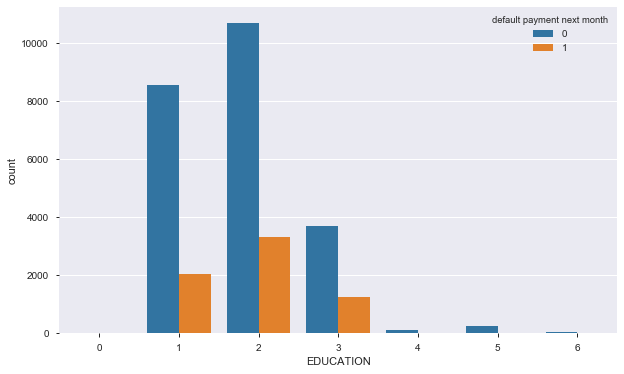

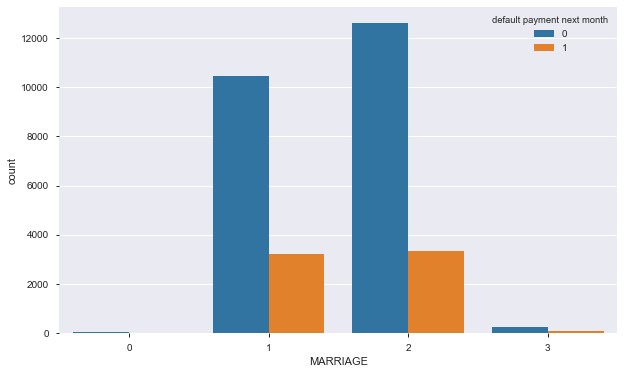

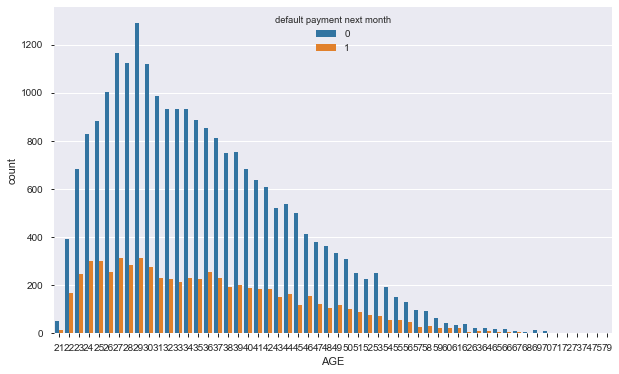

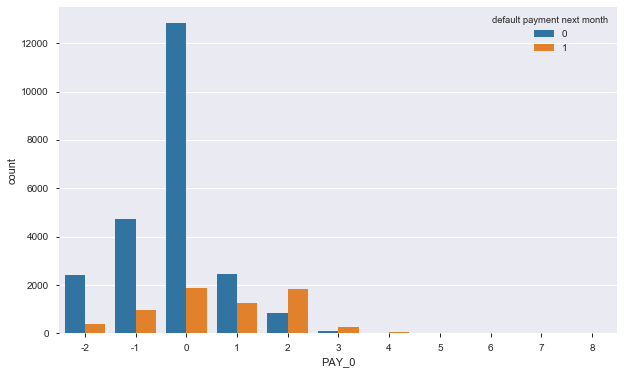

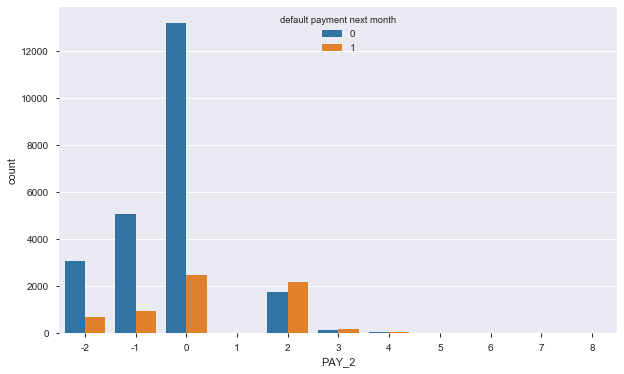

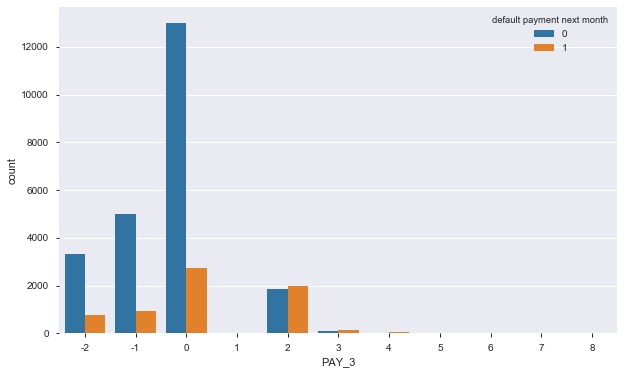

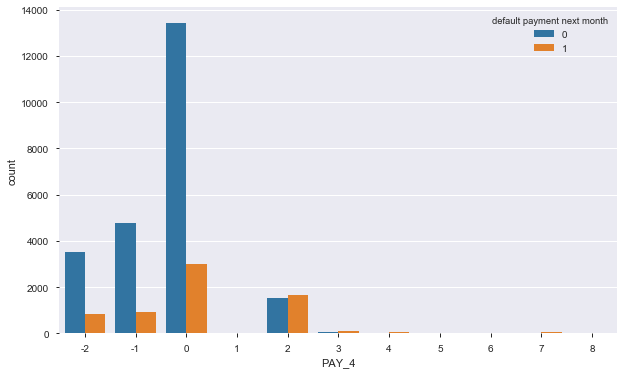

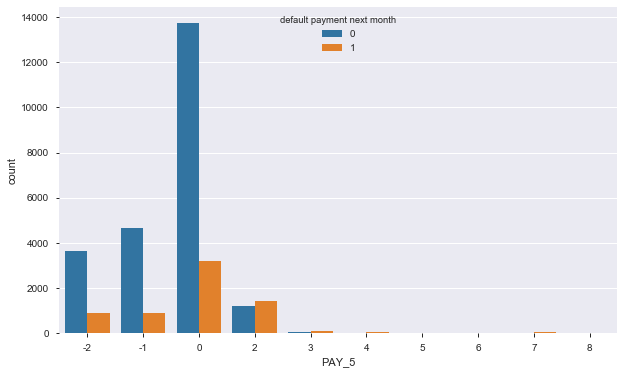

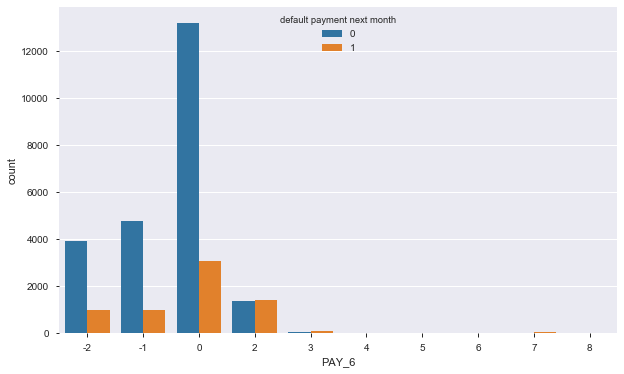

In [14]:
for c in all_data.columns[2:12]:
    fig, ax = plt.subplots(figsize=(10,6))
    sns.countplot(x = c, hue="default payment next month", data = all_data)

In [188]:
pay_status_sum = all_data.iloc[:, 6:12].sum(axis=1)
bill_sum = all_data.iloc[:, 12:18].sum(axis=1)
pay_sum = all_data.iloc[:, 18:24].sum(axis=1)

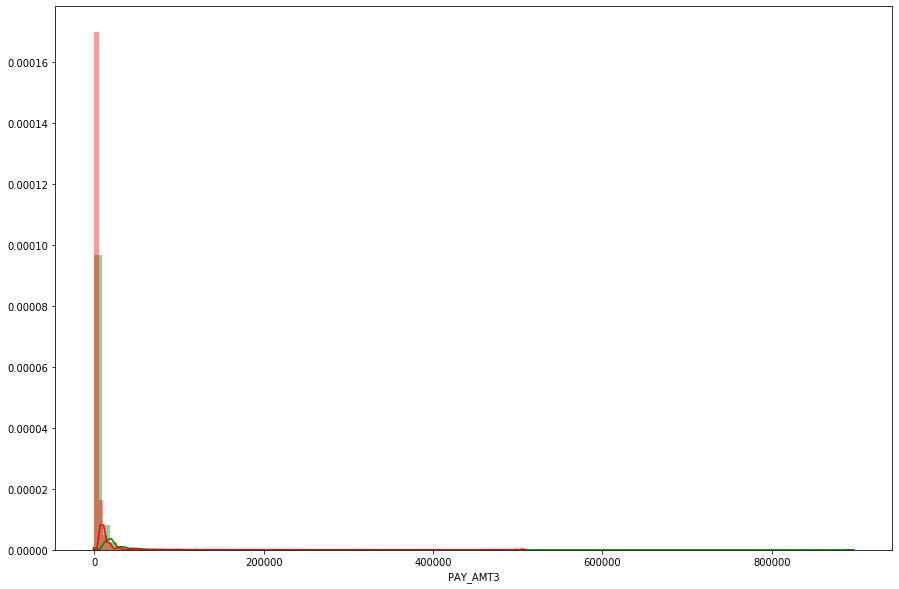

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(all_data["PAY_AMT3"][all_data["default payment next month"]==0],color='green', bins=100,label = 'default = 0')
sns.distplot(all_data["PAY_AMT3"][all_data["default payment next month"]==1],color='red', bins=100,label = 'default = 1')

### Explore sum of pay status, 检查逾期情况

Because the the encoding for payment status ranged from -2 to infinitive, and the less is the better. We can add up all the payment status and use the sum to plot a graph. We can divide the data into two groups which are "ltz": less than zero and "mtz":more than zero, and investigate the percentage of getting default next month in each group.

Text(0, 0.5, 'Frequency')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


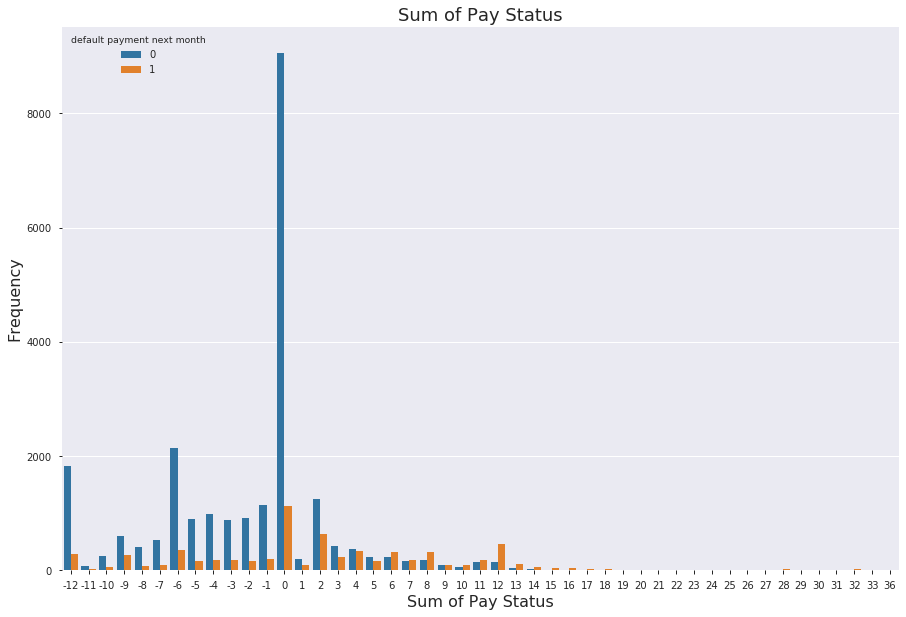

In [189]:
all_data["cumsum"]  = pay_status_sum
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(x = "cumsum", hue="default payment next month", data = all_data)
plt.title('Sum of Pay Status', fontsize=18)
plt.xlabel('Sum of Pay Status', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [191]:
ltz = all_data[all_data["cumsum"]<=0]
mtz = all_data[all_data["cumsum"]>0]
ltz_1 = ltz["default payment next month"][ltz["default payment next month"]==1].count()/len(ltz)
mtz_1 = mtz["default payment next month"][mtz["default payment next month"]==1].count()/len(mtz)

print("Percentage of individuals getting default with a sum of pay status <=0: {:.3f}%".format(ltz_1*100))
print("Percentage of individuals getting default with a sum of pay status >0: {:.3f}%".format(mtz_1*100))

Percentage of individuals getting default with a sum of pay status <=0: 13.815%
Percentage of individuals getting default with a sum of pay status >0: 48.745%


From the above results, we can see that only 13.8% of the "ltz" group will get a default of 1, while 48.7% the "mtz" group will get a default of 1.

### Explore limit-bill, 检查逾额情况

In [192]:
all_data["limit-bill"] = all_data['LIMIT_BAL']*6 - bill_sum

In [193]:
spent_less_than_limit = all_data[all_data["limit-bill"]>=0]
spent_more_than_limit= all_data[all_data["limit-bill"]<0]
sll_1 = spent_less_than_limit["default payment next month"][spent_less_than_limit["default payment next month"]==1].count()/len(spent_less_than_limit)
sml_1 = spent_more_than_limit["default payment next month"][spent_more_than_limit["default payment next month"]==1].count()/len(spent_more_than_limit)

print("Percentage of individuals getting default who spent less than the limit: {:.3f}%".format(sll_1*100))
print("Percentage of individuals getting default who spent more than the limit: {:.3f}%".format(sml_1*100))

Percentage of individuals getting default who spent less than the limit: 21.857%
Percentage of individuals getting default who spent more than the limit: 34.223%


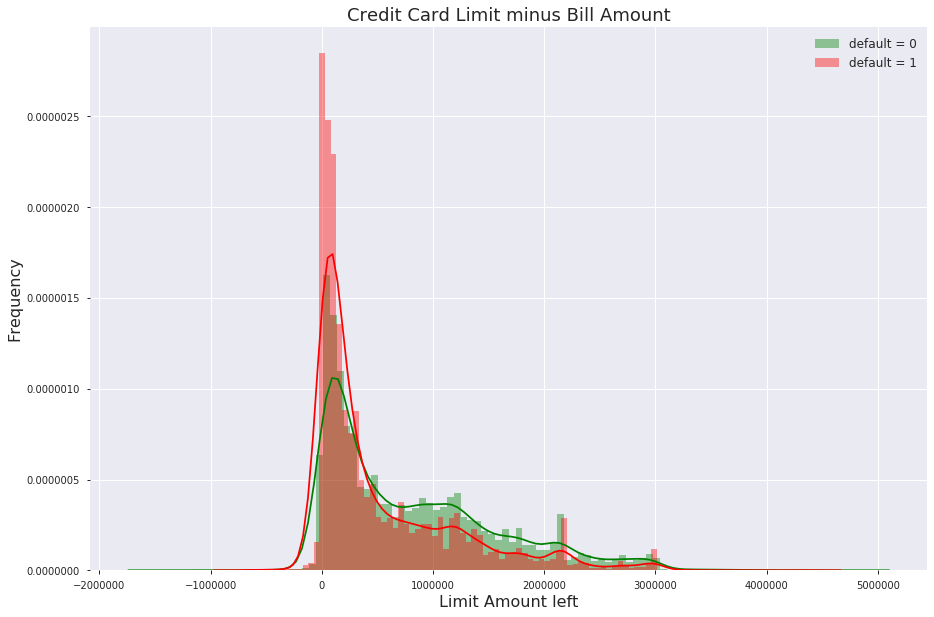

In [194]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(all_data["limit-bill"][all_data["default payment next month"]==0],color='green', bins=100,label = 'default = 0')
sns.distplot(all_data["limit-bill"][all_data["default payment next month"]==1],color='red', bins=100,label = 'default = 1')
plt.title('Credit Card Limit minus Bill Amount', fontsize=18)
plt.xlabel('Limit Amount left', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(prop={'size': 12})

### Explore Bill - Pay, 检查未还额情况

In [195]:
# bill_sum.replace(0, 0.001, inplace = True) #so that the denominator won't be zero
all_data["bill-pay"] = bill_sum - pay_sum

In [196]:
paid_less_than_bill = all_data[all_data["bill-pay"]>0]
paid_more_than_bill = all_data[all_data["bill-pay"]<=0]
plb_1 = paid_less_than_bill["default payment next month"][paid_less_than_bill["default payment next month"]==1].count()/len(paid_less_than_bill)
pmb_1 = paid_more_than_bill["default payment next month"][paid_more_than_bill["default payment next month"]==1].count()/len(paid_more_than_bill)

print("Percentage of individuals getting default who paid less than the bill: {:.3f}%".format(plb_1*100))
print("Percentage of individuals getting default who paid more than the bill: {:.3f}%".format(pmb_1*100))

Percentage of individuals getting default who paid less than the bill: 22.472%
Percentage of individuals getting default who paid more than the bill: 20.178%


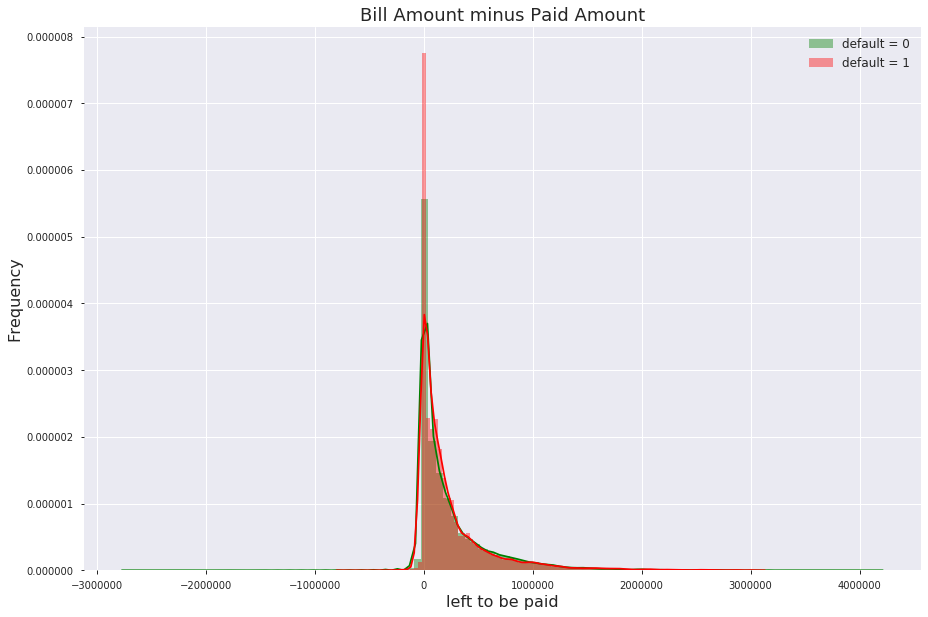

In [197]:
fig, ax = plt.subplots(figsize=(15,10))
# plt.plot(paid_less_than_bill["bill-pay"][paid_less_than_bill["default payment next month"]==0])
sns.distplot(all_data["bill-pay"][all_data["default payment next month"]==0],color='green', bins=100,label = 'default = 0')
sns.distplot(all_data["bill-pay"][all_data["default payment next month"]==1],color='red', bins=100,label = 'default = 1')
plt.title('Bill Amount minus Paid Amount', fontsize=18)
plt.xlabel('left to be paid', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(prop={'size': 12})

### Evaluate the skewness of the distribution

In [198]:
bills = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for c in bills:
    fig, ax = plt.subplots(figsize=(10,6))
    plt.title(c + " Distribution", fontsize=12)
    plt.xlabel('Amount in Dollars', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    n, bins, patches = plt.hist(x=all_data[c], bins='auto', color='#0504aa', rwidth=0.85)

SyntaxError: invalid syntax (<ipython-input-198-3738064d5a7c>, line 8)

From the above diagram, we can see that the data is highly skewed, transformation is necessary  before trainning so that the data do not negatively affect the performance of a learning algorithm. Later I will be using a cubic root transformation significantly to reduce the range of values caused by outliers.

## Conclusion of this dataset

1. is this dataset balanced?
    From the ProfileReport we can know that this dataset is not balanced. To solve this problem:

    1. talk about evaluatio metrics 
    2. ...

    use this source and your own findings to fill this part in 
    https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5
2. is any feature skewed?
3. is there any correlation?


In [199]:
all_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'cumsum', 'limit-bill', 'bill-pay'],
      dtype='object')

# 4. Data Cleaning  and Data Transformation

In [200]:
# check for unique values in each columns
for c in all_data.columns[2:12]:
    unique_vals = all_data[c].unique()
    print(c,"-"*5,unique_vals)

SEX ----- [2 1]
EDUCATION ----- [2 1 3 5 4 6 0]
MARRIAGE ----- [1 2 3 0]
AGE ----- [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
PAY_0 ----- [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 ----- [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 ----- [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 ----- [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 ----- [-2  0 -1  2  3  5  4  7  8  6]
PAY_6 ----- [-2  2  0 -1  3  6  4  7  8  5]


In EDUCATION column, 0, 5 and 6 both encodes for 'unknown'. 
In MARRIAGE column, 0 is an extra category. 
To clean this:
    1. covert 0, 5, 6 to 4, which encodes for 'others'.

Conclusion: The missing value is only 1.15% of the dataset, so removing the rows which contains null values should not affect the prediction too much.

In [292]:
def clean(data):
    
    data = data.rename(columns={"PAY_0": "PAY_1"}) #rename the feature PAY_0 to keep the names consistent
    
    sex = {2:0} #0:female,1:male
    data["SEX"] = data["SEX"].replace(sex)
    
    data["EDUCATION"].replace([0,5,6], 4, inplace = True)
    data["MARRIAGE"].replace([0], 3, inplace = True)
    
    Y = data['default payment next month']
    data.drop('default payment next month', axis = 1,inplace = True)
    data.drop('ID', axis = 1,inplace = True)
    train = data
    
    #Normalise the range
    bills = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
    
    features_cubic_transformed = train
    features_cubic_transformed[bills] = train[bills].apply(lambda x: np.sign(x) * np.power(abs(x), 1./3))
    
    for c in bills:
        fig, ax = plt.subplots(figsize=(10,6))
        n, bins, patches = plt.hist(x=features_cubic_transformed[c], bins='auto', color='#0504aa', rwidth=0.85)
    
    # scale all numerical data
    numerical = ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
    
    scaler = MinMaxScaler()
    features_cubic_transformed[numerical] = scaler.fit_transform(features_cubic_transformed[numerical])
    
    to_drop = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
    final = pd.get_dummies(features_cubic_transformed, columns = ["EDUCATION","MARRIAGE"])
    final.drop(to_drop, axis = 1,inplace = True)
    
    return final,Y

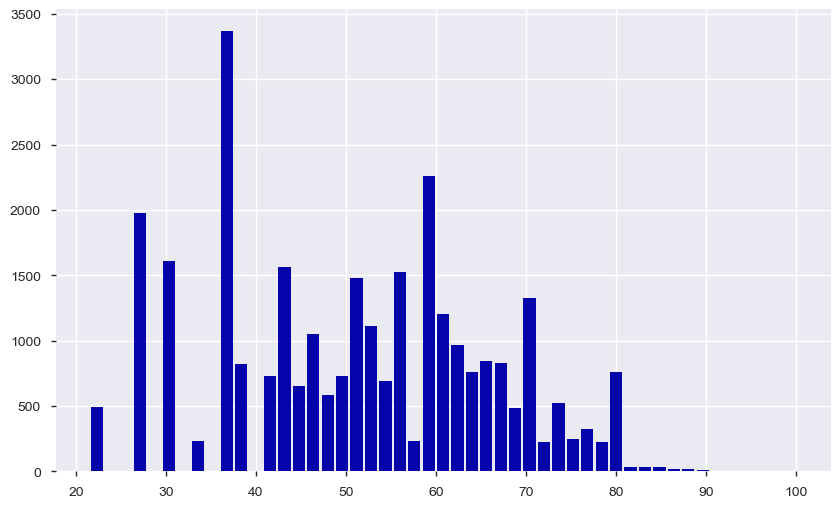

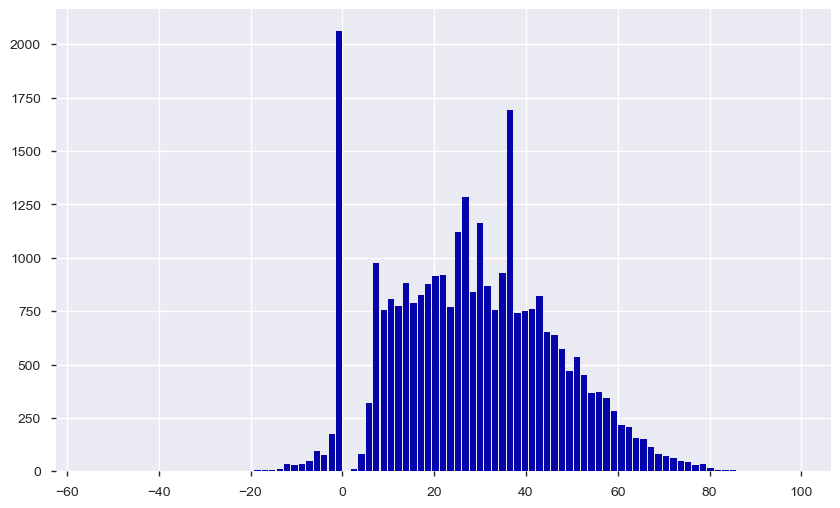

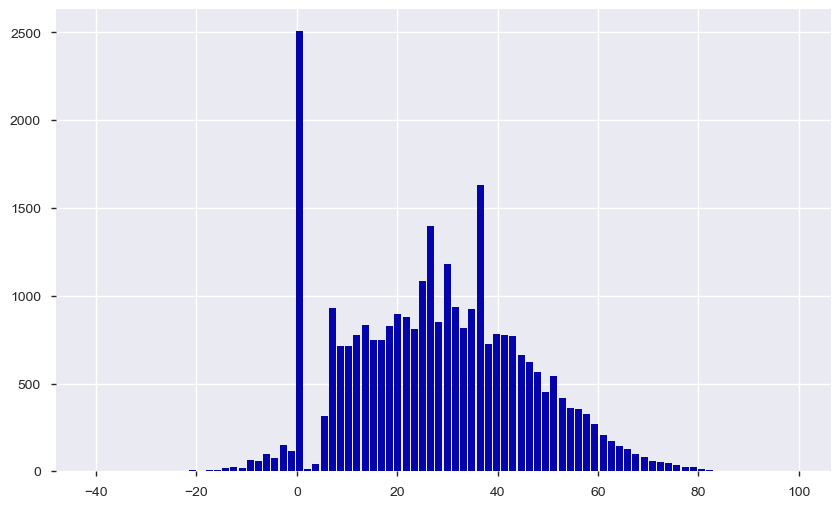

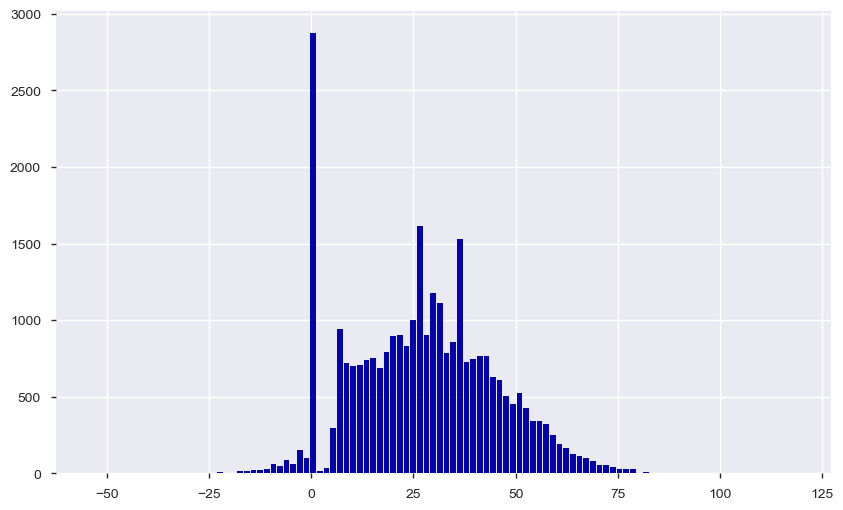

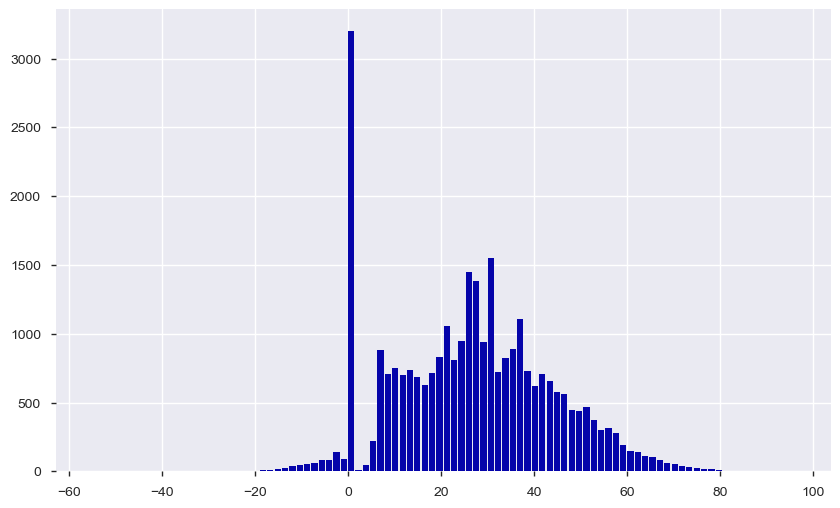

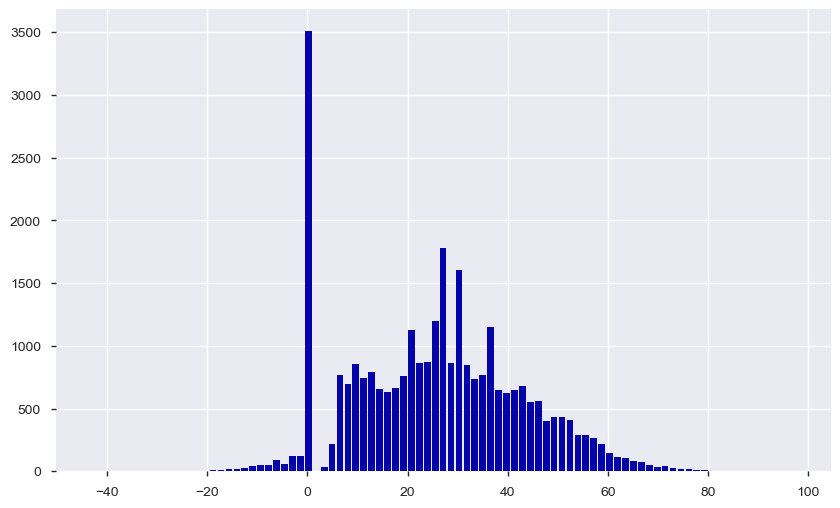

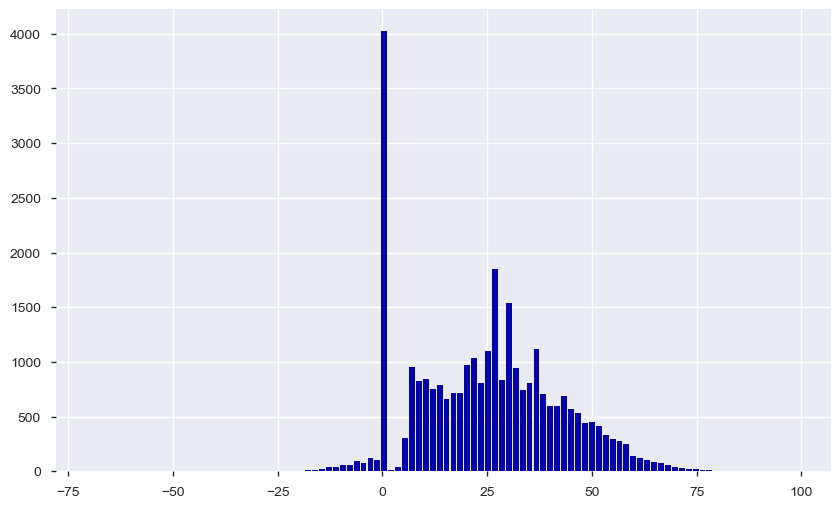

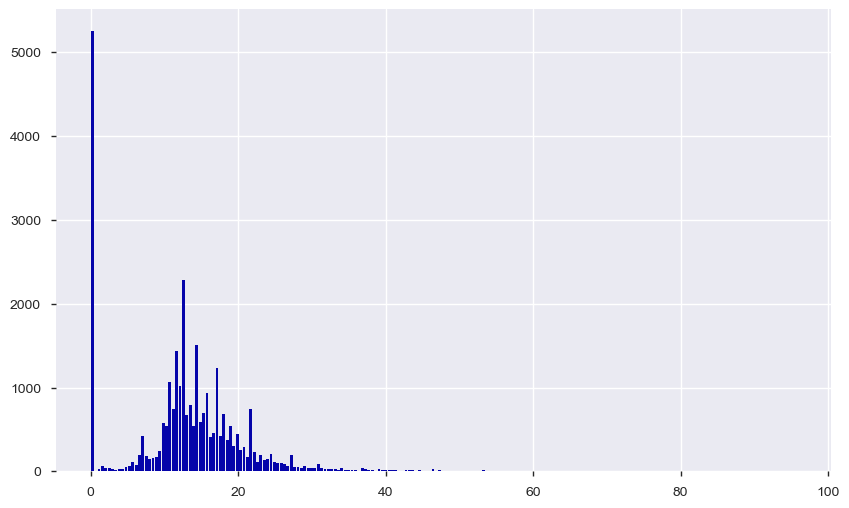

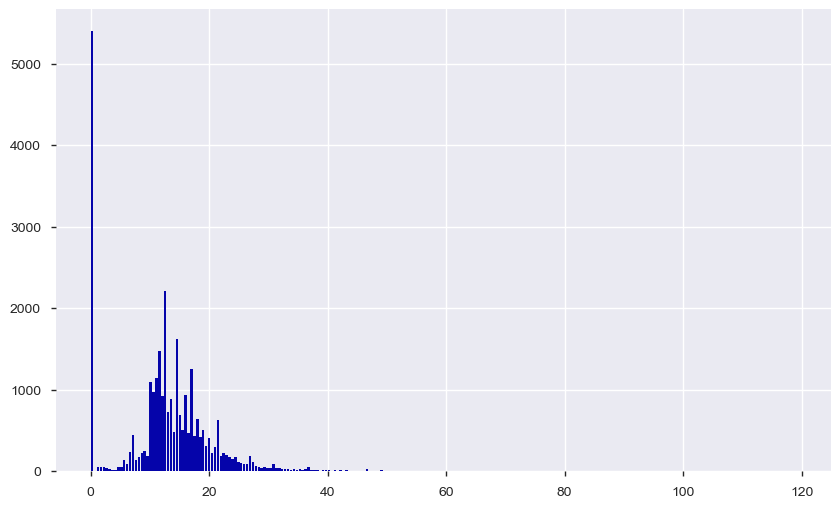

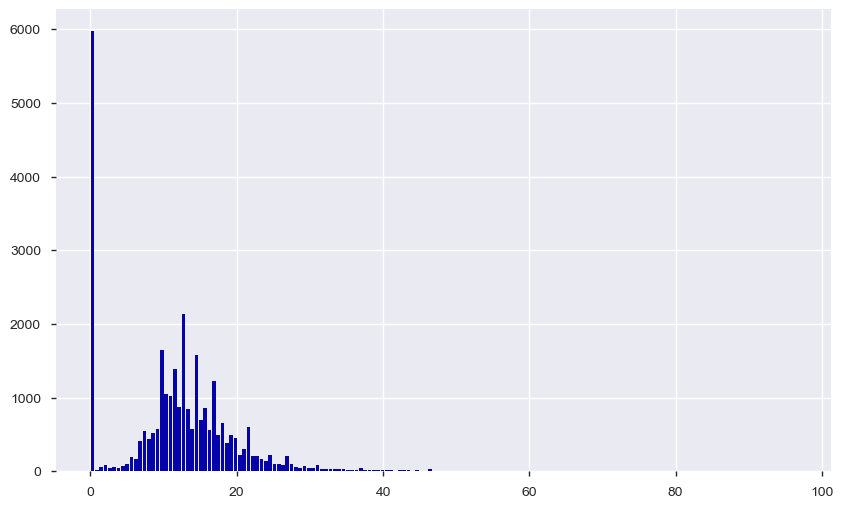

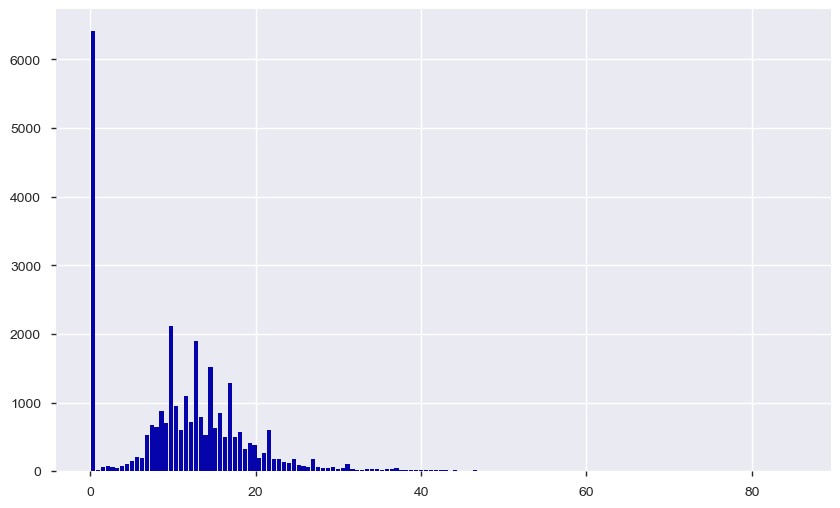

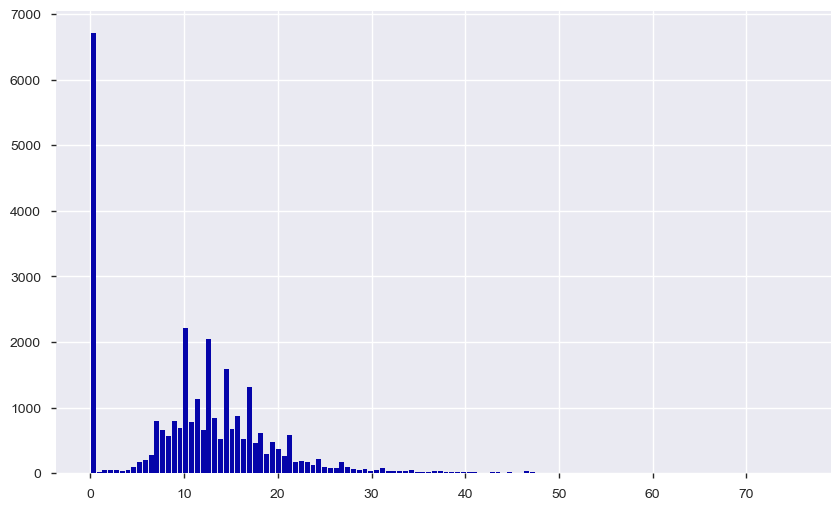

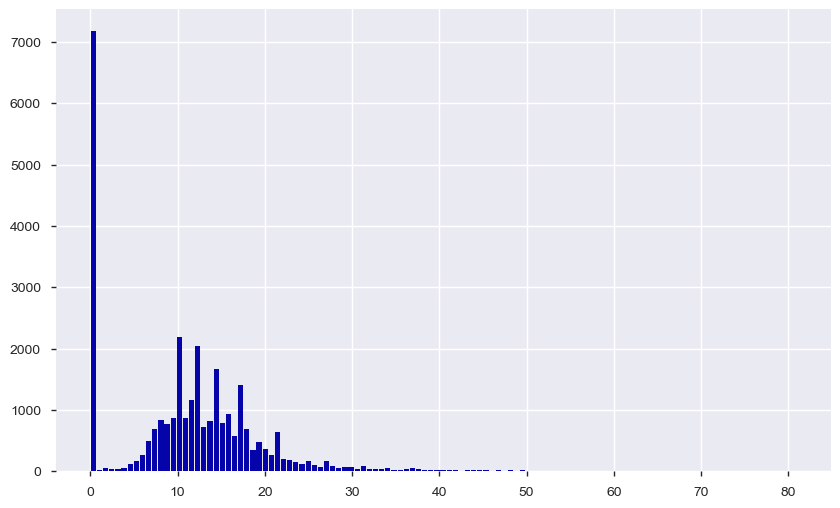

In [293]:
# clean the data
X,Y = clean(all_data)

In [291]:
pandas_profiling.ProfileReport(all_data)

Number of variables,29
Number of observations,30000
Total Missing (%),0.0%
Total size in memory,6.6 MiB
Average record size in memory,232.0 B
Numeric,21
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,6


In [295]:
# Split the 'features' and 'income' data into training and testing sets
train_x, test_x, train_y, test_y= train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.2, 
                                                    random_state = 41)

# Show the results of the split
print("Training set has {} samples.".format(train_x.shape[0]))
print("Testing set has {} samples.".format(test_x.shape[0]))

Training set has 24000 samples.
Testing set has 6000 samples.


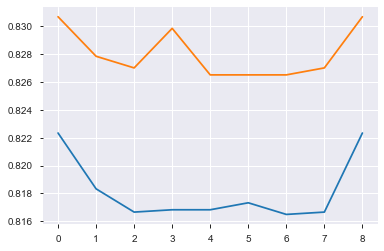

In [26]:
#test accuracy against the original data

first = []
second = []
for n in range(1,30,4):
    clf1 = AdaBoostClassifier(random_state=41,n_estimators = n)
    clf1.fit(train_x,train_y)
    accuracy1 = clf1.score(test_x,test_y)
    first.append(accuracy1)
    
    
    clf2 = AdaBoostClassifier(random_state=41,n_estimators = n)
    clf2.fit(otrain_x,otrain_y)
    accuracy2 = clf2.score(otest_x,otest_y)
    second.append(accuracy2)
    
first.append(max(first))
second.append(max(second))
    
accuracy_table = pd.DataFrame([first, second],columns = range(1,34,4))        
accuracy_table

plt.plot(first)
plt.plot(second)

In [27]:
accuracy_table

,1,5,9,13,17,21,25,29,33
0,0.822333,0.818333,0.816667,0.816833,0.816833,0.817333,0.8165,0.816667,0.822333
1,0.830667,0.827833,0.827000,0.829833,0.826500,0.826500,0.8265,0.827000,0.830667


In [28]:
# importance..............TBC
importances = clf2.feature_importances_
import_list = importances.tolist()
df= pd.DataFrame(import_list, index = otrain_x.columns)
df.columns = ["clf2"]

# 5. Methodology Overview

Start by describing in broad terms your methodology. Include any background reading you may have done and a step by step description of how you have trained and evaluated your model. Describe any feature engineering that you have applied. If you had attempted different approaches prior to landing on your final methodology, then describe those approaches here.


### Model Selection

In [29]:
def train_predict(learner,sample_size, X_train, y_train, X_test, y_test): 
    results = {}
    
    # Fit the learner
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    # Calculate the training time
    results['train_time'] = end-start

    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    results['pred_time'] = end-start
    results['acc_train'] = accuracy_score(y_train,predictions_train)
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    results['f_train'] = fbeta_score(y_train,predictions_train,beta = 3)
    results['f_test'] = fbeta_score(y_test,predictions_test, beta = 3)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__,sample_size))
        
    # Return the results
    return results

In [30]:
tt = []
atr = []
ftr = []
pt = []
at = []
ft = []

# Initialize the models
clf_A = AdaBoostClassifier(random_state = 42)
clf_B = SVC(random_state = 42, gamma = 'auto')
clf_C = KNeighborsClassifier()
clf_D = RandomForestClassifier(random_state = 42)
clf_E = BaggingClassifier(random_state = 42)
clf_F = DecisionTreeClassifier(random_state = 42)
clf_G = GradientBoostingClassifier(random_state = 42)
clf_H = LogisticRegression(random_state = 42)
clf_I = SGDClassifier(random_state = 42)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F, clf_G, clf_H, clf_I]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = \
    train_predict(clf,24000, train_x, train_y, test_x, test_y)
    
    
for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
    for k, learner in enumerate(results.keys()):
        if j == 0:
            tt.append(results[learner][metric])
        if j == 1:
            atr.append(results[learner][metric])
        if j == 2:
            ftr.append(results[learner][metric])
        if j == 3:
            pt.append(results[learner][metric])
        if j == 4:
            at.append(results[learner][metric])
        if j == 5:
            ft.append(results[learner][metric])   

AdaBoostClassifier trained on 24000 samples.
SVC trained on 24000 samples.
KNeighborsClassifier trained on 24000 samples.
RandomForestClassifier trained on 24000 samples.
BaggingClassifier trained on 24000 samples.
DecisionTreeClassifier trained on 24000 samples.
GradientBoostingClassifier trained on 24000 samples.
LogisticRegression trained on 24000 samples.
SGDClassifier trained on 24000 samples.


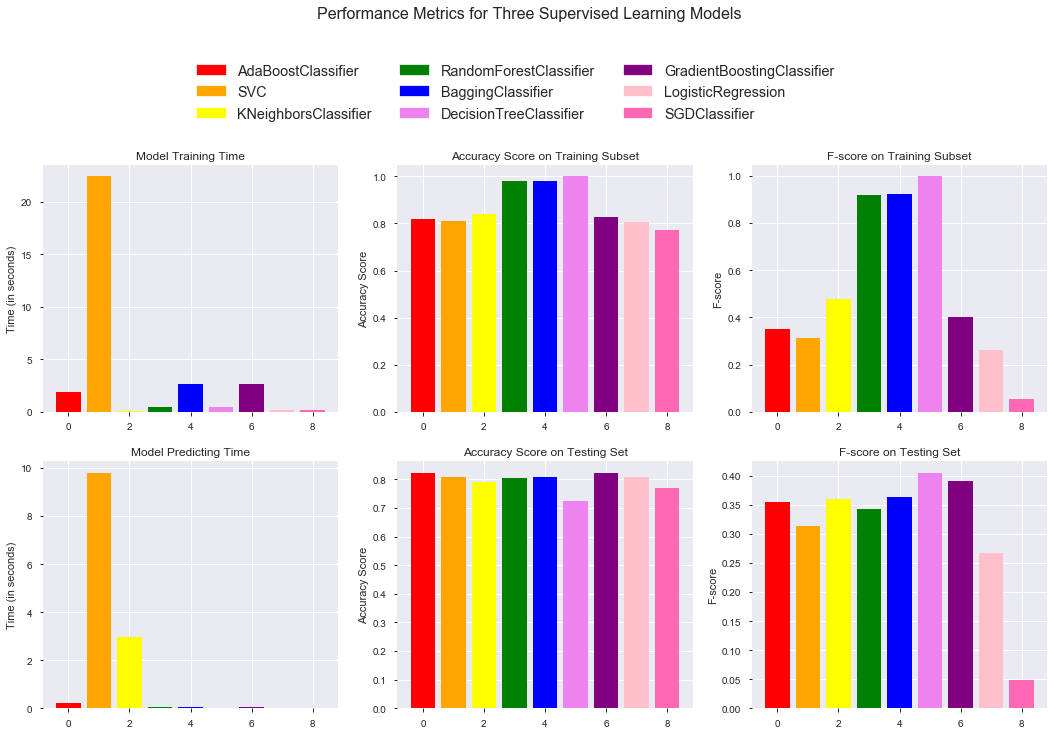

In [31]:
# comparison btw different models using 
fig, ax = plt.subplots(2, 3, figsize = (18,10))
colors = ['red','orange','yellow','green','blue','violet','purple','pink','hotpink']
ax[0,0].bar(range(len(results)), tt, align='center',color = colors)
ax[0,1].bar(range(len(results)), atr, align='center',color = colors)
ax[0,2].bar(range(len(results)), ftr, align='center',color = colors)
ax[1,0].bar(range(len(results)), pt, align='center',color = colors)
ax[1,1].bar(range(len(results)), at, align='center',color = colors)
ax[1,2].bar(range(len(results)), ft, align='center',color = colors)

 # Add titles
ax[0, 0].set_title("Model Training Time")
ax[0, 1].set_title("Accuracy Score on Training Subset")
ax[0, 2].set_title("F-score on Training Subset")
ax[1, 0].set_title("Model Predicting Time")
ax[1, 1].set_title("Accuracy Score on Testing Set")
ax[1, 2].set_title("F-score on Testing Set")

# Add unique y-labels
ax[0, 0].set_ylabel("Time (in seconds)")
ax[0, 1].set_ylabel("Accuracy Score")
ax[0, 2].set_ylabel("F-score")
ax[1, 0].set_ylabel("Time (in seconds)")
ax[1, 1].set_ylabel("Accuracy Score")
ax[1, 2].set_ylabel("F-score")

 # Create patches for the legend
patches = []
for i, learner in enumerate(results.keys()):
    patches.append(mpatches.Patch(color = colors[i], label = learner))
plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.63), loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')

plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
plt.show()

<font color="red"> # fill this in 
    
Based on the above graph, we can see that the best model for this project is .......because......

# 6. Model training/validation

This contains a breakdown of how your model was trained and evaluated.


# Todo list
+ cross validation, grid search
+ argue the model complexity
+ visualise training error and CV error to evaluate the model
+ 

In [183]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import learning_curve, train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns

    

classifiers = [
    SVC(random_state = 1, kernel = 'rbf'),    
    DecisionTreeClassifier(random_state = 42, criterion = 'gini'),
    RandomForestClassifier(random_state = 42, criterion = 'gini'),
    KNeighborsClassifier(metric = 'minkowski'),
#     AdaBoostClassifier(random_state = 42)
#     BaggingClassifier(random_state = 42)
#     GradientBoostingClassifier(random_state = 42)
#     LogisticRegression(random_state = 42)

]

classifier_names = [
            'svc', 
            'decisiontreeclassifier',
            'randomforestclassifier',
            'kneighborsclassifier',
]

classifier_param_grid = [
            {'svc__C':[1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,5,6]} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
]
 

def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy'):
    response = {}
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, scoring = score)
    search = gridsearch.fit(train_x, train_y)
    print("GridSearch best parameter：", search.best_params_)
    print("GridSearch best score： %0.4lf" %search.best_score_)
    predict_y = gridsearch.predict(test_x)
    print("Accuracy %0.4lf" %accuracy_score(test_y, predict_y))
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y,predict_y)
    return response
 
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([,
            ('pca',PCA()),
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')

/Users/sdu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



GridSearch best parameter： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearch best score： 0.8177
Accuracy 0.8182


/Users/sdu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



GridSearch best parameter： {'decisiontreeclassifier__max_depth': 6}
GridSearch best score： 0.8055
Accuracy 0.8078


/Users/sdu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



GridSearch best parameter： {'randomforestclassifier__n_estimators': 6}
GridSearch best score： 0.7936
Accuracy 0.7962


/Users/sdu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



GridSearch best parameter： {'kneighborsclassifier__n_neighbors': 8}
GridSearch best score： 0.8038
Accuracy 0.8050


In [32]:
# import library
from sklearn.metrics import make_scorer
X_train = otrain_x
y_train = otrain_y
X_test = otest_x
y_test = otest_y

As we can see below, we are using all the features without selection and merge. We are doing the the raw machine learning and trying to use GridSearchCV to improve.

## 1.AdaBoostClassifier

In [296]:
# define the classifier.
clf = AdaBoostClassifier(n_estimators=10, random_state=0)
# training the classifier
clf.fit(train_x, train_y)
# do our predictions on the test
predictions = clf.predict(test_x)
# see how good we did on the test
accuracy_score(y_true = test_y, y_pred = predictions)

0.8168333333333333

In [297]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix"', cmap = plt.cm.Blues) :
    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def show_metrics():
    tp = cm.stats()['TP']
    fn = cm.stats()['FN']
    fp = cm.stats()['FP']
    tn = cm.stats()['TN']
    print('Precision: {:.3f}'.format(tp/(tp+fp)))
    print('Recall: {:.3f}'.format(tp/(tp+fn)))
    print('F1 score: {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))))

    
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2, color = 'b')
    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False       4480   186     4666
True         913   421     1334
__all__     5393   607     6000
------------------------------
Precision: 0.694
Recall: 0.316
F1 score: 0.434


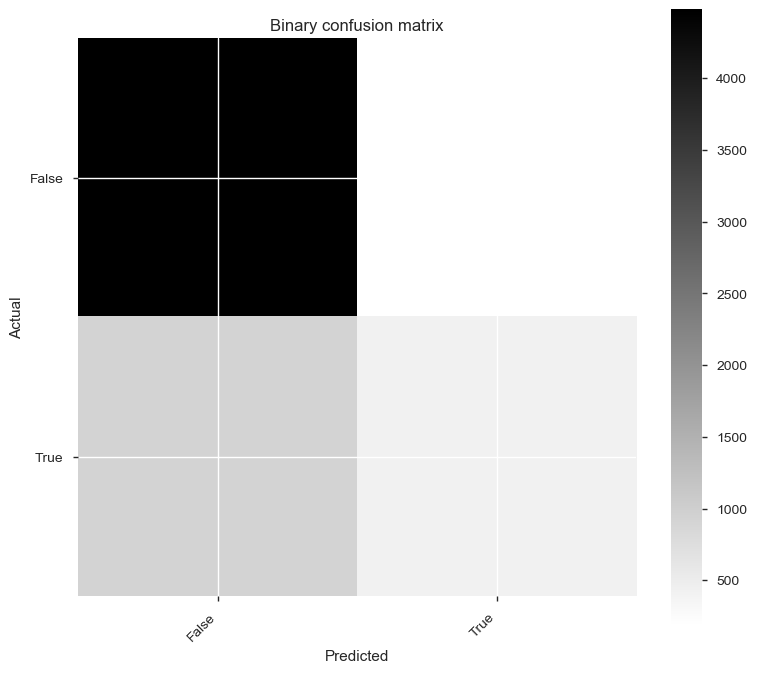

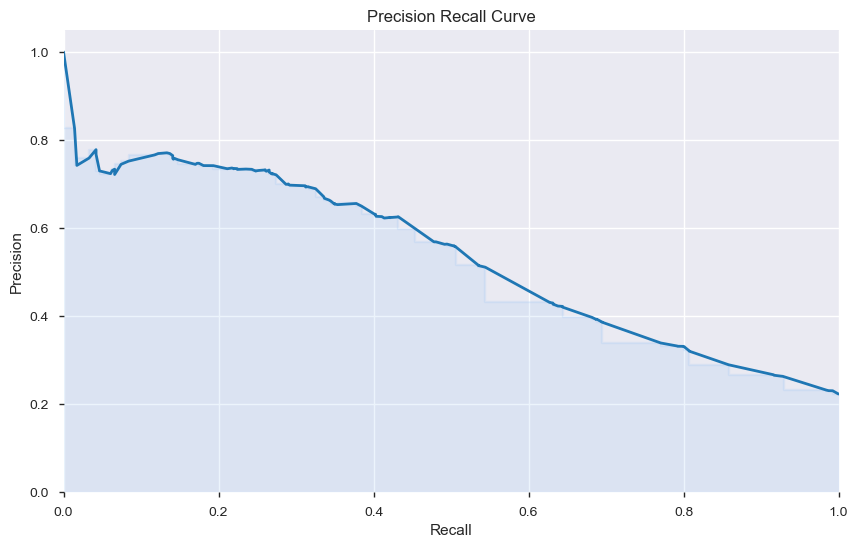

In [298]:
cm = ConfusionMatrix(test_y.tolist(), predictions.tolist())
print("Confusion matrix:\n%s" % cm)
cm.plot()
cm.stats()# to retrieve the dictionary 
print("-"*30)
show_metrics()
score_y = clf.decision_function(test_x)
precision, recall, thresholds = precision_recall_curve(test_y, score_y)
fig, ax = plt.subplots(figsize=(10,6))
plot_precision_recall()

Test on the raw classifier, what we mean by raw is 'by some not too bad hyperparamers'. The only requirements for the hyperparamers here are 'not too complex tree' and 'reliable and acceprable answers'

In [34]:
# define the classifier.
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
# training the classifier
clf.fit(otrain_x, otrain_y)
# do our predictions on the test
predictions = clf.predict(otest_x)
# see how good we did on the test
accuracy_score(y_true = otest_y, y_pred = predictions)

0.8283333333333334

The score is not too bad as expected, let's how about feed in the best hyperparameters gained by cross-validation in grid(GridSearchCV).

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.6, 0.8, 1.0]}

# create the grid 
grid_search_tree = GridSearchCV(AdaBoostClassifier(), param_grid, cv = 5, scoring= 'accuracy')

#training
grid_search_tree.fit(otrain_x, otrain_y)
#let's see the best estimator
print(grid_search_tree.best_estimator_)
#with its score
print(np.abs(grid_search_tree.best_score_))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.8,
                   n_estimators=100, random_state=None)
0.8160833333333334


Let's see the classifier with predicted best hyperparamers gained by cross-validation through GridSearchCV

In [36]:
classifier = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.8,
                   n_estimators=100, random_state=None)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.8313333333333334

## 2.DecisionTreeClssifier

In [37]:
# define the clssifier and fit with the train data
classifier = DecisionTreeClassifier(max_depth=500, random_state=14)
classifier.fit(X_train, y_train)
# do our predictions on the test and see the scores
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.7296666666666667

In [38]:
# define the parameters grid
param_grid = {'max_depth': np.arange(8, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')
grid_tree.fit(X_train, y_train)

#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.8168333333333333


In [39]:
classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.8306666666666667

## GradientBoostingClassifier

In [40]:
# define the clssifier and fit with the train data
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)
# do our predictions on the test and see the scores
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.8325

In [41]:
# define the parameters grid
# param_grid = {'max_depth':range(5,16,1),
#             'min_samples_split':range(200,1001,200),
#              'max_features':range(7,20,2)}

# create the grid
# grid_tree = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5, scoring= 'accuracy')
# grid_tree.fit(X_train, y_train)

#let's see the best estimator
# print(grid_tree.best_estimator_)
#with its score
# print(np.abs(grid_tree.best_score_))

In [42]:
# classifier = GradientBoostingClassifier()
# classifier.fit(X_train, y_train)
# predictions = classifier.predict(X_test)
# accuracy_score(y_true = y_test, y_pred = predictions)
# some tests

# 7. Results

Here you show the results that you obtain using your model on the training data. If you have multiple variations or approaches, this is where you compare them.


# 8. Final predictions

This is the section where you perform your final predictions on the test set using the model that you have trained in the previous section.


# 9. References

https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5